In [2]:
!which python

/Users/ludmila.kuncarova/opt/anaconda3/envs/pymc3_env/bin/python


In [4]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [13]:
def posterior_grid_approx(grid_points=5, success=4, tosses=15, prior="uniform"):
    """"""
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    if prior == "uniform":
        prior = np.repeat(5, grid_points)
    elif prior == "truncated":    
        prior = (p_grid >= 0.5).astype(int)
    elif prior == "double_exp":
        prior = np.exp(- 5 * abs(p_grid - 0.5))
    else: 
        print("Invalid prior definition")
        return
        
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    
    df = pd.DataFrame({'p_grid': p_grid, 'prior': prior, 'likelihood': likelihood, 'unstd_posterior': unstd_posterior, 'posterior': posterior })
    return df

 ### Ex. 1

In [16]:
stats.binom.pmf(1, 4, 0.5)

0.25

In [17]:
df = posterior_grid_approx(grid_points=10000,success=4, tosses=15, prior="uniform")
df

,p_grid,prior,likelihood,unstd_posterior,posterior
0,0.0000,5,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0001,5,1.364045e-13,6.820223e-13,2.182690e-16
2,0.0002,5,2.180071e-12,1.090036e-11,3.488463e-15
3,0.0003,5,1.102447e-11,5.512237e-11,1.764092e-14
4,0.0004,5,3.480446e-11,1.740223e-10,5.569270e-14
...,...,...,...,...,...
9995,0.9996,5,5.722361e-35,2.861180e-34,9.156693e-38
9996,0.9997,5,2.417814e-36,1.208907e-35,3.868890e-39
9997,0.9998,5,2.796358e-38,1.398179e-37,4.474621e-41
9998,0.9999,5,1.365956e-41,6.829779e-41,2.185748e-44


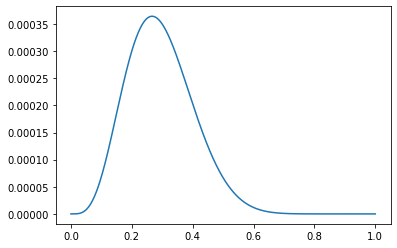

In [18]:
plt.plot(df.p_grid, df.posterior)

In [19]:
samples = np.random.choice(df.p_grid, p=df.posterior, size=10000, replace=True)

In [20]:
samples.mean()

0.29314011401140116

<AxesSubplot:>

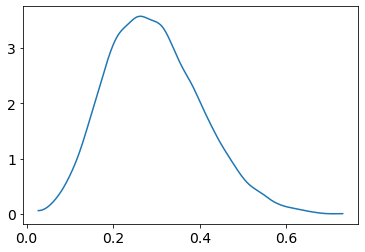

In [21]:
az.plot_kde(samples)

### Ex. 2

In [23]:
df2 = posterior_grid_approx(grid_points=10000, success=4, tosses=6,prior="truncated")
df2

,p_grid,prior,likelihood,unstd_posterior,posterior
0,0.0000,0,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0001,0,1.500300e-15,0.000000e+00,0.000000e+00
2,0.0002,0,2.400000e-14,0.000000e+00,0.000000e+00
3,0.0003,0,1.214757e-13,0.000000e+00,0.000000e+00
4,0.0004,0,3.838463e-13,0.000000e+00,0.000000e+00
...,...,...,...,...,...
9995,0.9996,1,2.396641e-06,2.396641e-06,2.169298e-09
9996,0.9997,1,1.348650e-06,1.348650e-06,1.220719e-09
9997,0.9998,1,5.996400e-07,5.996400e-07,5.427588e-10
9998,0.9999,1,1.499700e-07,1.499700e-07,1.357440e-10


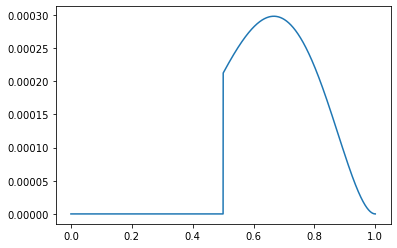

In [24]:
plt.plot(df2.p_grid, df2.posterior)

### Ex. 3

In [28]:
samples = np.random.choice(df2.p_grid, p=df2.posterior, size=10000, replace=True)

#percentile
low_pi, high_pi = np.percentile(samples, [4, 96])
print(low_pi, high_pi)

0.519051905190519 0.8903930393039303


In [29]:
#hdi
low_hdi, high_hdi = az.hdi(samples, hdi_prob=0.89)
print(low_hdi, high_hdi)

0.5005500550055005 0.8405840584058406


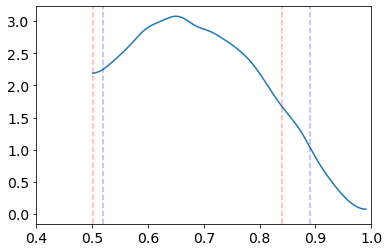

In [37]:
az.plot_kde(samples)
plt.xlim(.4, 1)

plt.axvline(low_hdi, color='r',linestyle='--',alpha=0.3)
plt.axvline(high_hdi, color='r',linestyle='--',alpha=0.3)

plt.axvline(low_pi, color='b',linestyle='--',alpha=0.3)
plt.axvline(high_pi, color='b',linestyle='--',alpha=0.3)